<a href="https://colab.research.google.com/github/satoruarakawa/CDS-Forecast/blob/main/%E9%9B%BB%E5%8A%9B%E4%BD%BF%E7%94%A8%E4%BA%88%E6%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# get_ipython().magic(u'config IPCompleter.greedy=True')

In [ ]:
#Google Driveへマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CDSクライアントをインストール
!pip install adh_sample_library_preview

In [ ]:
import requests
import configparser
import json
import pandas as pd
from datetime import date, timedelta
from adh_sample_library_preview import *

numberOfPreviewRows = 5 #各ステップで出力される行数を５行とする

In [ ]:
# CDSにclientid, client secretを用いてログイン
config = configparser.ConfigParser()
config.read('/content/drive/MyDrive/ADH/configADHAPAC.ini')

ADHClient = ADHClient(config.get('Access', 'ApiVersion'), config.get('Access', 'Tenant'), config.get('Access', 'Resource'), config.get('Credentials', 'ClientId'), config.get('Credentials', 'ClientSecret'))

namespaceId = config.get('Configurations', 'Namespace')
namespaceId

'cfc336b8-4956-4f4c-8486-73eb995c31bb'

# CONNECT Data servicesからデータ取得

In [ ]:
dateFrom = '2025-02-10'
dateTo ='2025-05-10'
timeinterval = '00:01:00' #インターバル：１分間隔にする

#dataviewId = Wind Turbine Data_NN, where NN is your specific student number (e.g. NN=01 in this example)
dataviewId= "SA-Home-View"

#data, n, f = ocsClient.DataViews.getDataInterpolated(namespace_id=namespaceId, dataView_id=dataviewId, count=150000,startIndex=dateFrom, endIndex=dateTo, interval=timeinterval)
data, n, f = ADHClient.DataViews.getDataInterpolated(namespace_id=namespaceId, data_view_id=dataviewId, count=150000,start_index=dateFrom, end_index=dateTo, interval=timeinterval)

# アウトプット (but truncate it after a handful of rows)
data[:numberOfPreviewRows]



[{'Timestamp': '2025-02-10T00:00:00',
  'Name': 'SA-Home',
  'SA-HEMS-0 CO2 ppm': 648,
  'SA-HEMS-0 Electricity Ws': 144.3449596442758,
  'SA-HEMS-0 Humidity %': 0,
  'SA-HEMS-0 Temperature °C': 0},
 {'Timestamp': '2025-02-10T00:01:00',
  'Name': 'SA-Home',
  'SA-HEMS-0 CO2 ppm': 648.7295671485734,
  'SA-HEMS-0 Electricity Ws': 133.44651497999305,
  'SA-HEMS-0 Humidity %': 0,
  'SA-HEMS-0 Temperature °C': 0},
 {'Timestamp': '2025-02-10T00:02:00',
  'Name': 'SA-Home',
  'SA-HEMS-0 CO2 ppm': 651,
  'SA-HEMS-0 Electricity Ws': 146.5654207743528,
  'SA-HEMS-0 Humidity %': 0,
  'SA-HEMS-0 Temperature °C': 0},
 {'Timestamp': '2025-02-10T00:03:00',
  'Name': 'SA-Home',
  'SA-HEMS-0 CO2 ppm': 649.0544310714861,
  'SA-HEMS-0 Electricity Ws': 143.85065643052621,
  'SA-HEMS-0 Humidity %': 0,
  'SA-HEMS-0 Temperature °C': 0},
 {'Timestamp': '2025-02-10T00:04:00',
  'Name': 'SA-Home',
  'SA-HEMS-0 CO2 ppm': 649,
  'SA-HEMS-0 Electricity Ws': 133.65877265830196,
  'SA-HEMS-0 Humidity %': 0,
  'SA-HE

# データフレーム投入

In [ ]:
# データフレーム定義
df = pd.DataFrame(data)
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

df = df[['Timestamp', 'SA-HEMS-0 CO2 ppm', 'SA-HEMS-0 Electricity Ws']]
df[:numberOfPreviewRows]


,Timestamp,SA-HEMS-0 CO2 ppm,SA-HEMS-0 Electricity Ws
0,2025-02-10 00:00:00,648.000000,144.344960
1,2025-02-10 00:01:00,648.729567,133.446515
2,2025-02-10 00:02:00,651.000000,146.565421
3,2025-02-10 00:03:00,649.054431,143.850656
4,2025-02-10 00:04:00,649.000000,133.658773


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#カラム名を略称にして、次の相関関係の表を見やすくする
df.rename(columns = {'SA-HEMS-0 CO2 ppm':'CO2', 'SA-HEMS-0 Electricity Ws':'Elect'}, inplace = True)

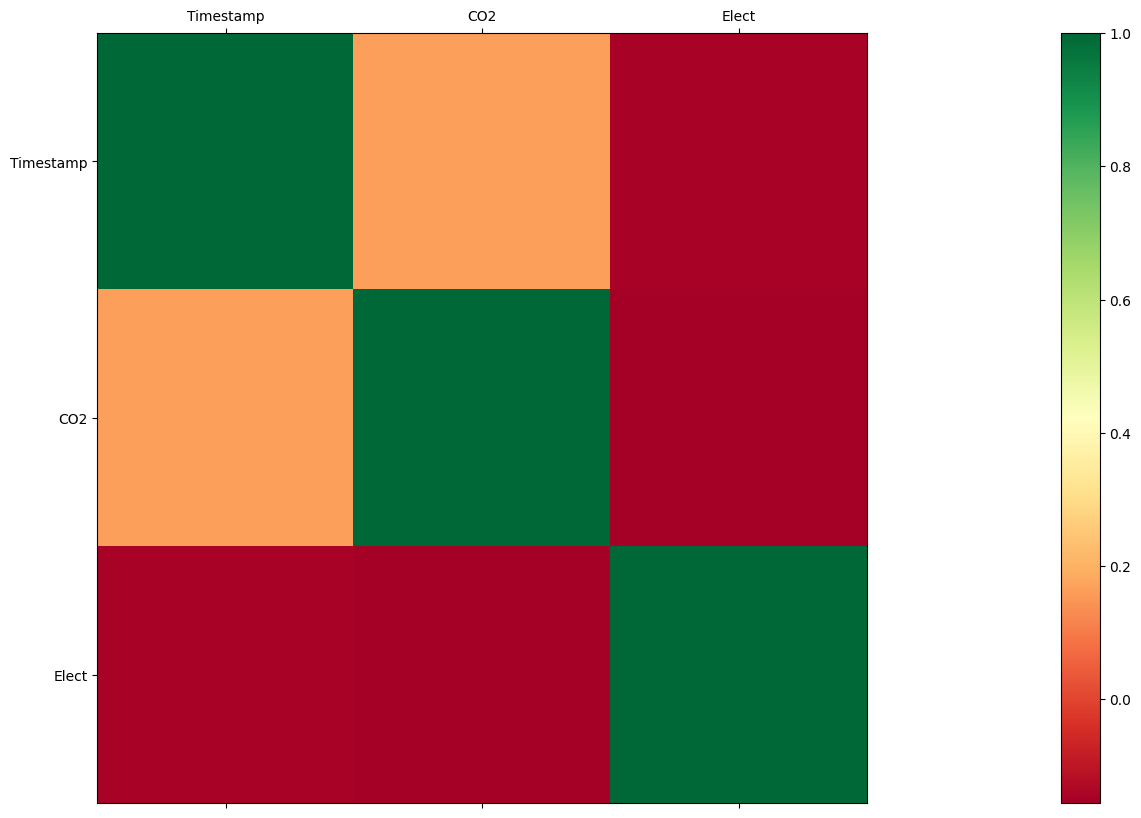

In [ ]:
#発電量と他の変数との相関を確認する

#相関テーブル作成
df_corr = df.corr()

#図のサイズ拡張
fig = plt.figure(figsize=(50,10))
ax = fig.add_subplot(111)

#カラーパレットセット (Red, yellow, green)
cax = ax.matshow(df_corr, cmap=plt.cm.RdYlGn)
fig.colorbar(cax)

#ラベル設定
labels = [c for c in df_corr.columns]

#すべてのラベルを表示
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

#相関図のxとyにラベルを設定
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show(block=False)

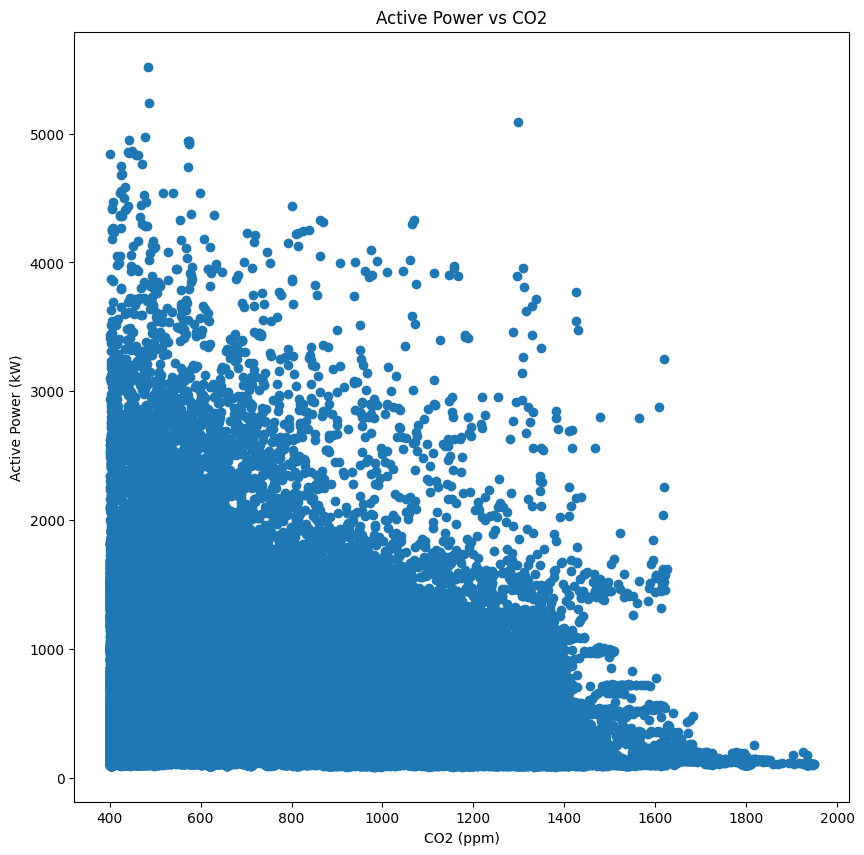

In [ ]:
#電力消費量とCO2の相関関係のプロット（）

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df['CO2'], df['Elect'])
ax.set_xlabel('CO2 (ppm)')
ax.set_ylabel('Active Power (kW)')
ax.set_title('Active Power vs CO2')

plt.show(block=False)

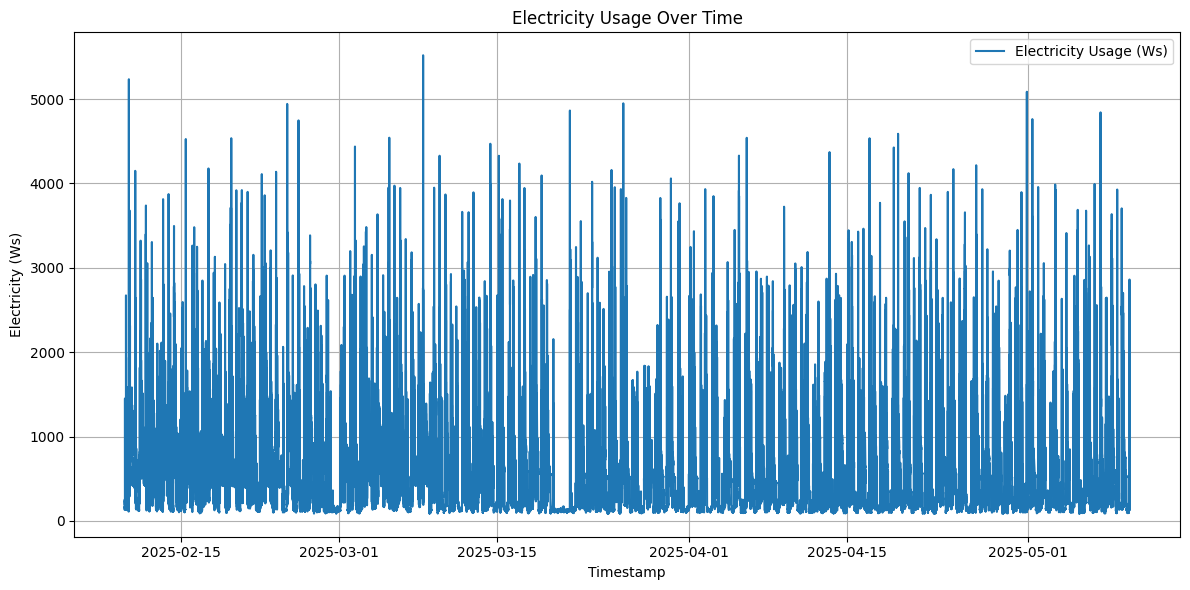

In [ ]:
# 電力消費のグラフの描画
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Elect'], label='Electricity Usage (Ws)')
plt.xlabel('Timestamp')
plt.ylabel('Electricity (Ws)')
plt.title('Electricity Usage Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# データ予測

In [ ]:
# Facebookが開発した時系列予測モデルProphetをインストール
!pip install prophet

In [ ]:
from prophet import Prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_vo00hy9/_pvqjpv1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_vo00hy9/vx3kdjpr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76054', 'data', 'file=/tmp/tmp_vo00hy9/_pvqjpv1.json', 'init=/tmp/tmp_vo00hy9/vx3kdjpr.json', 'output', 'file=/tmp/tmp_vo00hy9/prophet_modelbpge7tp8/prophet_model-20250510025948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:59:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:01:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version

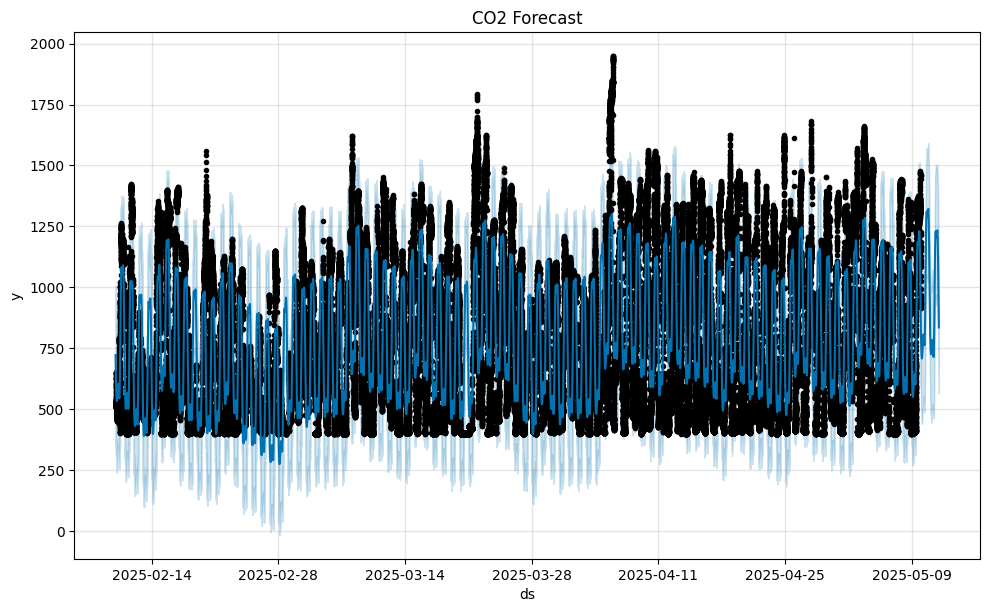

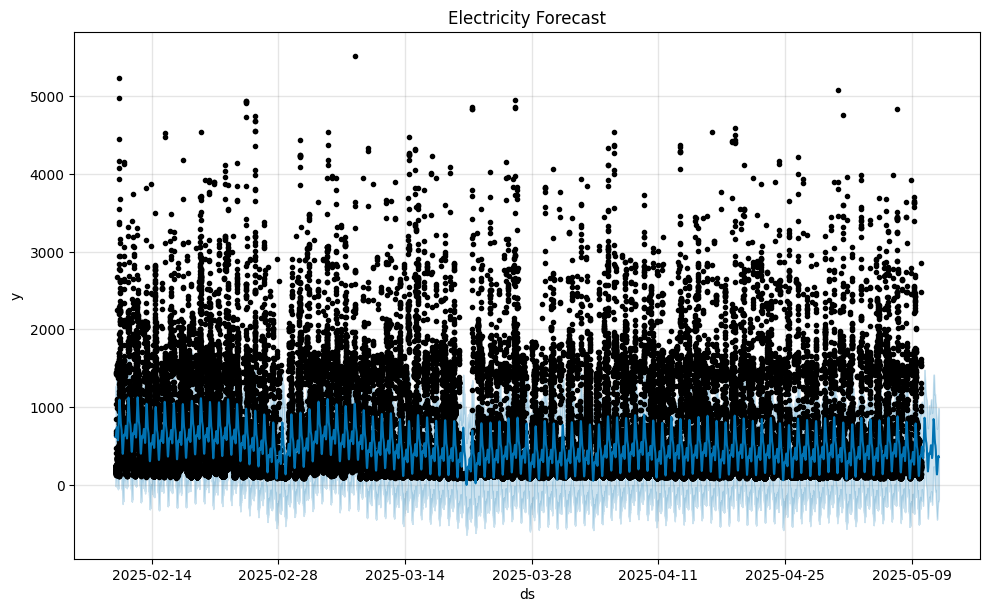

In [ ]:
# --------------------
# CO2予測用の準備
# --------------------
df_co2 = df[['Timestamp', 'CO2']].rename(columns={
    'Timestamp': 'ds',
    'CO2': 'y'
})

model_co2 = Prophet()
model_co2.fit(df_co2)

future_co2 = model_co2.make_future_dataframe(periods=48, freq='H')  # 例：48時間先まで
forecast_co2 = model_co2.predict(future_co2)

# --------------------
# Electricity予測用の準備
# --------------------
df_ele = df[['Timestamp', 'Elect']].rename(columns={
    'Timestamp': 'ds',
    'Elect': 'y'
})

model_ele = Prophet()
model_ele.fit(df_ele)

future_ele = model_ele.make_future_dataframe(periods=48, freq='H')  # 例：48時間先まで
forecast_ele = model_ele.predict(future_ele)

# --------------------
# グラフ表示（オプション）
# --------------------
model_co2.plot(forecast_co2)
plt.title("CO2 Forecast")
plt.show()

model_ele.plot(forecast_ele)
plt.title("Electricity Forecast")
plt.show()

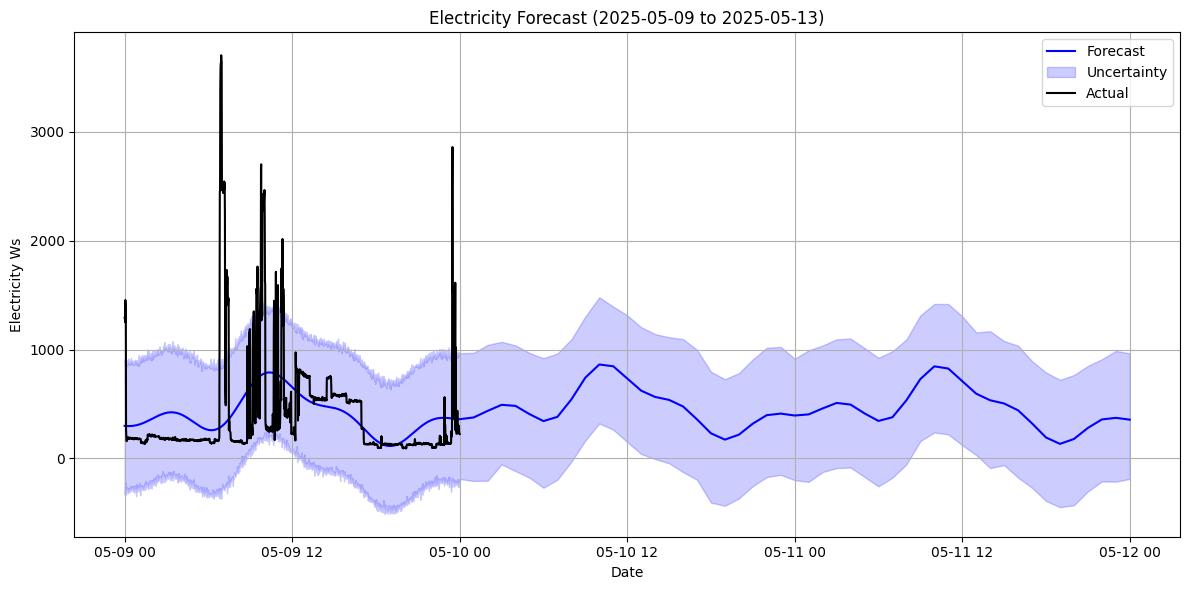

In [ ]:
# 期間の指定
start_date = '2025-05-09'
end_date = '2025-05-13'

# 必要な列だけ抽出し、日付でフィルター
plot_df = forecast_ele[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
plot_df = plot_df[(plot_df['ds'] >= start_date) & (plot_df['ds'] <= end_date)]

# 元のデータ（実測）も同じ期間に絞る
actual_df = df_ele[(df_ele['ds'] >= start_date) & (df_ele['ds'] <= end_date)]

# プロット
plt.figure(figsize=(12, 6))
plt.plot(plot_df['ds'], plot_df['yhat'], label='Forecast', color='blue')
plt.fill_between(plot_df['ds'], plot_df['yhat_lower'], plot_df['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty')
plt.plot(actual_df['ds'], actual_df['y'], label='Actual', color='black')

plt.xlabel('Date')
plt.ylabel('Electricity Ws')
plt.title(f'Electricity Forecast ({start_date} to {end_date})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plot_df[:numberOfPreviewRows]

,ds,yhat,yhat_lower,yhat_upper
126720,2025-05-09 00:00:00,299.302831,-327.553105,912.748246
126721,2025-05-09 00:01:00,299.123071,-281.544422,876.853698
126722,2025-05-09 00:02:00,298.952606,-268.244319,870.327021
126723,2025-05-09 00:03:00,298.791676,-219.198833,920.343282
126724,2025-05-09 00:04:00,298.640517,-337.573504,881.702912


In [ ]:
#予測される電力、時間のタイプを作成
#ただし、今回はすでにあるTypeを使用するため、この処理は実行しない。
typeId = "SA-HEMS"

typeSAHEMS = SdsType(
    typeId,
    SdsTypeCode.Object,
    description="HEMS Data")

#doubleとdatetimeの2つのデータ型を使用
doubleType = SdsType("doubleType", SdsTypeCode.Double)
timeType = SdsType("string", SdsTypeCode.DateTime)

#2つの属性(予想電力、時間)を設定
predActPowerProp = SdsTypeProperty("Electricity", sds_type=doubleType)
timeProp = SdsTypeProperty("Timestamp", True, timeType)

#属性をTypオブジェクトのプロパティに設定
typeSAHEMS.Properties = [predActPowerProp, timeProp]

#TypeをCDSに登録
ADHClient.Types.getOrCreateType(namespaceId, typeSAHEMS)

In [ ]:
#上で定義したTypeを用いて、新しいStreamを作成
typeId = "SA-HEMS"
streamId = "SA-HEMS-Home-Forecast"

predPowerStream = SdsStream(
    streamId,
    typeId,
    description="SA HEMS Power Forecast")

#Commit the stream to CDS
ADHClient.Streams.getOrCreateStream(namespaceId, predPowerStream)

In [ ]:
#予測されたデータをCDSに送る

values = []

for index, row in plot_df.iterrows():
        values.append({"Electricity": row["yhat"],
                       "Timestamp": row["ds"].strftime('%Y-%m-%d %H:%M:%S') })

ADHClient.Streams.updateValues(namespaceId, streamId, json.dumps(values))
global finished
finished = True